# Analyzing Datascience universities across US

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('timesMergedData.csv')
print(df.shape)
df.head(10)

(954, 27)


,SCHOOL,STATE,CITY,NOC,PROGRAM,TYPE,DEPARTMENT,DELIVERY,DURATION,PREREQ,...,RESEARCH,CITATIONS,INCOME,TOTAL_SCORE,NUM_STUDENTS,STUDENT_STAFF_RATIO,INTERNATIONAL_STUDENTS,F_M_RATIO,YEAR,timesData
0,Albright College,Pennsylvania,Reading,1,M.S. in Business Intelligence,M,Erivan K. Haub School of Business,Online,30 credits,Not Available,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,American Sentinel University,Colorado,Aurora,1,Master of Science Business Intelligence and An...,M,Not Available,Online,36 credits,Not Available,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,American University,District of Columbia,Washington,2,Online MBA with Analytics Concentration,M,Kogod School of Business,Online,15 months,Not Available,...,16.5,41.1,35.9,-,"11,604",12.0,12%,60:40:00,2016.0,1
3,American University,District of Columbia,Washington,2,Master of Science in Analytics,M,Kogod School of Business,Online,33 credit hours,Not Available,...,16.5,41.1,35.9,-,"11,604",12.0,12%,60:40:00,2016.0,1
4,Arizona State University,Arizona,Tempe,1,Master of Science in Business Analytics,M,W.P. Carey School of Business,Online or Campus,9 month (FT) or 16 month (online),Not Available,...,35.9,83.6,31.4,48.9,"83,236",29.9,9%,50:50:00,2014.0,1
5,Arizona State University,Arizona,Tempe,1,Master of Science in Business Analytics,M,W.P. Carey School of Business,Online or Campus,9 month (FT) or 16 month (online),Not Available,...,44.1,66.9,-,50.3,"83,236",29.9,9%,50:50:00,2011.0,1
6,Arizona State University,Arizona,Tempe,1,Master of Science in Business Analytics,M,W.P. Carey School of Business,Online or Campus,9 month (FT) or 16 month (online),Not Available,...,45.2,79.9,31.8,51.9,"83,236",29.9,9%,50:50:00,2013.0,1
7,Arizona State University,Arizona,Tempe,1,Master of Science in Business Analytics,M,W.P. Carey School of Business,Online or Campus,9 month (FT) or 16 month (online),Not Available,...,39.0,80.3,28.7,49.9,"83,236",29.9,9%,50:50:00,2012.0,1
8,Arizona State University,Arizona,Tempe,1,Master of Science in Business Analytics,M,W.P. Carey School of Business,Online or Campus,9 month (FT) or 16 month (online),Not Available,...,37.5,73.1,32.6,46.9,"83,236",29.9,9%,50:50:00,2015.0,1
9,Arizona State University,Arizona,Tempe,1,Master of Science in Business Analytics,M,W.P. Carey School of Business,Online or Campus,9 month (FT) or 16 month (online),Not Available,...,38.1,84.6,32,49.7,"83,236",29.9,9%,50:50:00,2016.0,1


In [3]:
df.drop(['timesData','YEAR','F_M_RATIO','INCOME','COUNTRY','COUNTRY','WORLD_RANK','INTERNATIONAL','PREREQ','STUDENT_STAFF_RATIO','INTERNATIONAL_STUDENTS','LINK','DURATION'],axis=1,inplace=True)

In [4]:
df.columns

Index(['SCHOOL', 'STATE', 'CITY', 'NOC', 'PROGRAM', 'TYPE', 'DEPARTMENT',
       'DELIVERY', 'LOC_LAT', 'LOC_LONG', 'TEACHING', 'RESEARCH', 'CITATIONS',
       'TOTAL_SCORE', 'NUM_STUDENTS'],
      dtype='object')

In [5]:
df.dtypes

SCHOOL           object
STATE            object
CITY             object
NOC               int64
PROGRAM          object
TYPE             object
DEPARTMENT       object
DELIVERY         object
LOC_LAT         float64
LOC_LONG        float64
TEACHING        float64
RESEARCH        float64
CITATIONS       float64
TOTAL_SCORE      object
NUM_STUDENTS     object
dtype: object

In [6]:
df.isnull().any()

SCHOOL          False
STATE           False
CITY            False
NOC             False
PROGRAM         False
TYPE            False
DEPARTMENT      False
DELIVERY        False
LOC_LAT         False
LOC_LONG        False
TEACHING         True
RESEARCH         True
CITATIONS        True
TOTAL_SCORE      True
NUM_STUDENTS     True
dtype: bool

In [7]:
df['TOTAL_SCORE']=df['TOTAL_SCORE'].replace(to_replace = '-', value =np.nan) 

In [8]:
df['TOTAL_SCORE']=df['TOTAL_SCORE'].astype(float)

In [9]:
df["NUM_STUDENTS"] = df["NUM_STUDENTS"].str.replace(",","").astype(float)

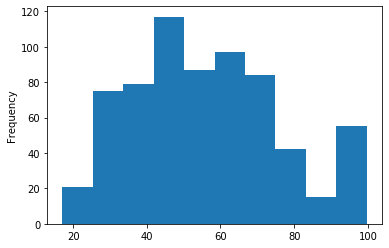

In [10]:
df['TEACHING'].plot(kind='hist')

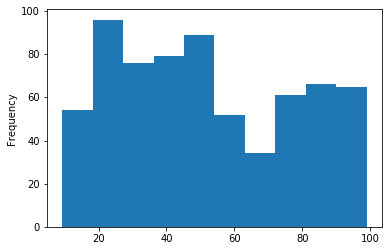

In [11]:
df['RESEARCH'].plot(kind='hist')

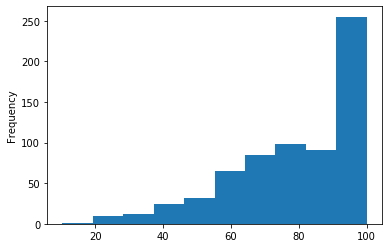

In [12]:
df['CITATIONS'].plot(kind='hist')

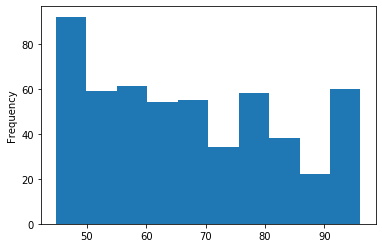

In [13]:
df['TOTAL_SCORE'].plot(kind='hist')

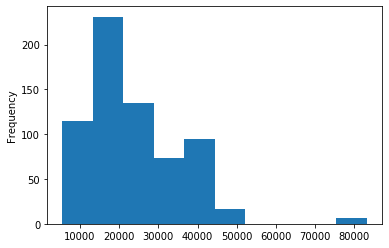

In [14]:
df['NUM_STUDENTS'].plot(kind='hist')

In [15]:
df['TEACHING']=df['TEACHING'].fillna(df['TEACHING'].mean())
df['RESEARCH']=df['RESEARCH'].fillna(df['RESEARCH'].mean())
df['CITATIONS']=df['CITATIONS'].fillna(df['CITATIONS'].median())
df['TOTAL_SCORE']=df['TOTAL_SCORE'].fillna(df['TOTAL_SCORE'].mean())
df['NUM_STUDENTS']=df["NUM_STUDENTS"].fillna(df["NUM_STUDENTS"].median())

In [16]:
df.head()

,SCHOOL,STATE,CITY,NOC,PROGRAM,TYPE,DEPARTMENT,DELIVERY,LOC_LAT,LOC_LONG,TEACHING,RESEARCH,CITATIONS,TOTAL_SCORE,NUM_STUDENTS
0,Albright College,Pennsylvania,Reading,1,M.S. in Business Intelligence,M,Erivan K. Haub School of Business,Online,40.3602,-75.9101,55.907738,52.238393,82.9,67.161538,20713.0
1,American Sentinel University,Colorado,Aurora,1,Master of Science Business Intelligence and An...,M,Not Available,Online,39.6766,-104.8310,55.907738,52.238393,82.9,67.161538,20713.0
2,American University,District of Columbia,Washington,2,Online MBA with Analytics Concentration,M,Kogod School of Business,Online,38.9378,-77.0901,42.200000,16.500000,41.1,67.161538,11604.0
3,American University,District of Columbia,Washington,2,Master of Science in Analytics,M,Kogod School of Business,Online,38.9378,-77.0901,42.200000,16.500000,41.1,67.161538,11604.0
4,Arizona State University,Arizona,Tempe,1,Master of Science in Business Analytics,M,W.P. Carey School of Business,Online or Campus,33.4219,-111.9400,33.800000,35.900000,83.6,48.900000,83236.0


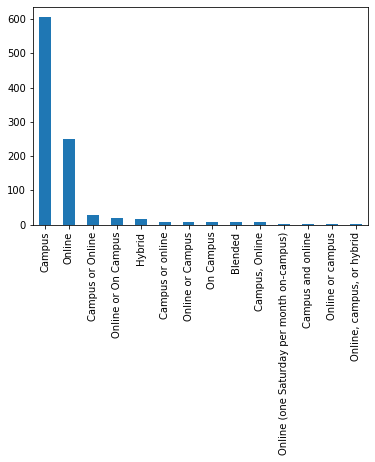

In [17]:
df['DELIVERY'].value_counts().plot(kind='bar')

In [18]:
df['DELIVERY']=df['DELIVERY'].replace(to_replace = 'Online or On Campus', value ='Campus or Online') 
df['DELIVERY']=df['DELIVERY'].replace(to_replace = 'Campus or online', value ='Campus or Online') 
df['DELIVERY']=df['DELIVERY'].replace(to_replace = 'Online or Campus', value ='Campus or Online')
df['DELIVERY']=df['DELIVERY'].replace(to_replace = 'Campus, Online', value ='Campus or Online') 
df['DELIVERY']=df['DELIVERY'].replace(to_replace = 'Online or On campus', value ='Campus or Online') 
df['DELIVERY']=df['DELIVERY'].replace(to_replace = 'On Campus', value ='Campus') 
df['DELIVERY']=df['DELIVERY'].replace(to_replace = 'Online, campus, or hybrid', value ='Blended')
df['DELIVERY']=df['DELIVERY'].replace(to_replace = 'Online (one Saturday per month on-campus)', value ='Campus and online')
df['DELIVERY']=df['DELIVERY'].replace(to_replace = 'Online or campus', value ='Campus or Online')

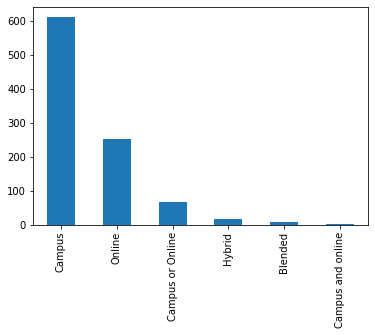

In [19]:
df['DELIVERY'].value_counts().plot(kind='bar')

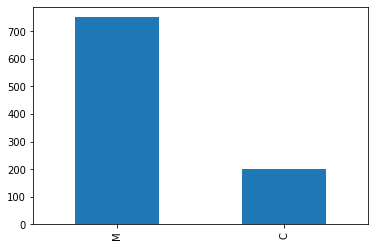

In [20]:
df['TYPE'].value_counts().plot(kind='bar')

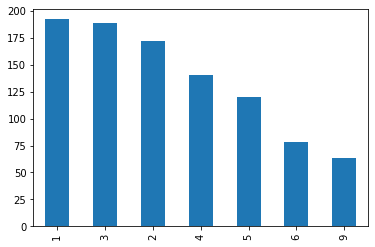

In [21]:
df['NOC'].value_counts().plot(kind='bar')

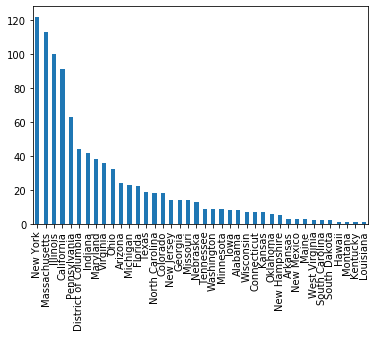

In [22]:
df['STATE'].value_counts().plot(kind='bar')

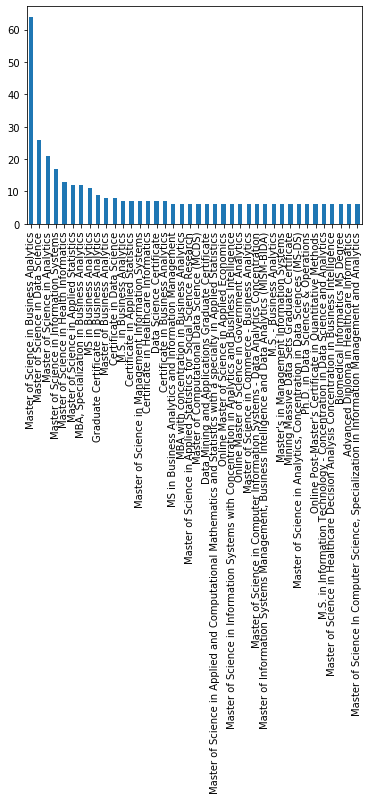

In [23]:
df['PROGRAM'].value_counts()[:40].plot(kind='bar')

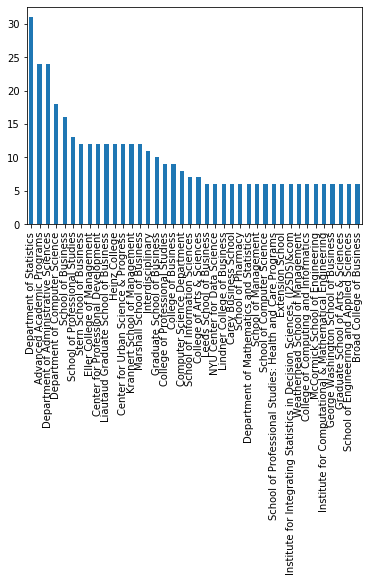

In [24]:
df['DEPARTMENT'].value_counts()[:40].plot(kind='bar')

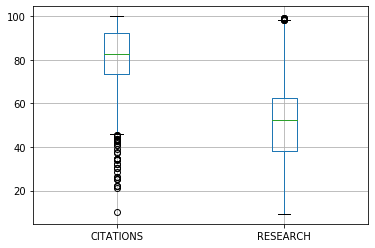

In [25]:
df.boxplot(column=['CITATIONS','RESEARCH'],return_type='axes')

In [26]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df[['DELIVERY','TYPE']]=df[['DELIVERY','TYPE']].apply(label_encoder.fit_transform)

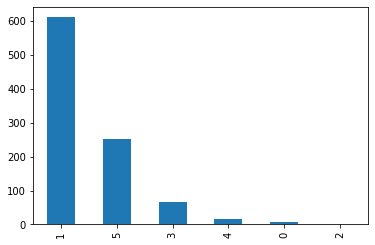

In [27]:
df['DELIVERY'].value_counts().plot(kind='bar')

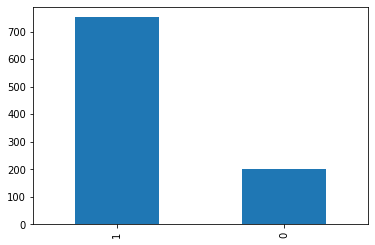

In [28]:
df['TYPE'].value_counts().plot(kind='bar')

In [29]:
x=df[['NOC','TYPE','DELIVERY','TEACHING','RESEARCH','CITATIONS','TOTAL_SCORE','NUM_STUDENTS']]

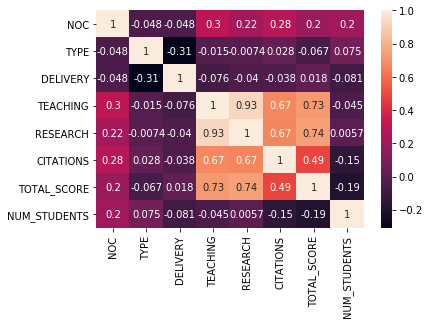

In [30]:
sns.heatmap(x.corr(),annot=True)

In [31]:
x=x.drop(['TEACHING','TOTAL_SCORE'],axis=1)

In [32]:
x.head()

,NOC,TYPE,DELIVERY,RESEARCH,CITATIONS,NUM_STUDENTS
0,1,1,5,52.238393,82.9,20713.0
1,1,1,5,52.238393,82.9,20713.0
2,2,1,5,16.500000,41.1,11604.0
3,2,1,5,16.500000,41.1,11604.0
4,1,1,3,35.900000,83.6,83236.0


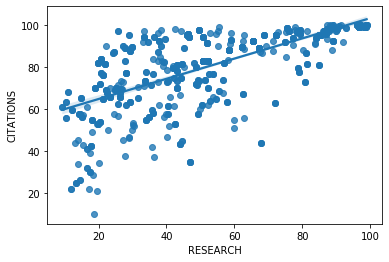

In [33]:
sns.regplot(x='RESEARCH',y='CITATIONS',data=df)

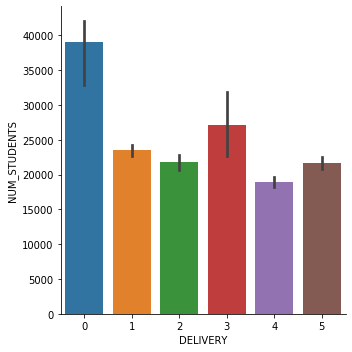

In [34]:
sns.catplot(x='DELIVERY',y='NUM_STUDENTS',data=x,kind='bar')

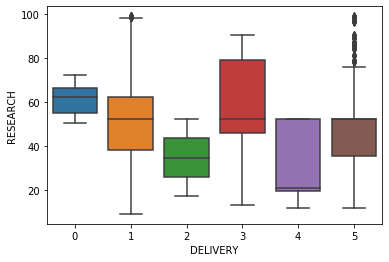

In [35]:
sns.boxplot(x='DELIVERY',y='RESEARCH',data=x)

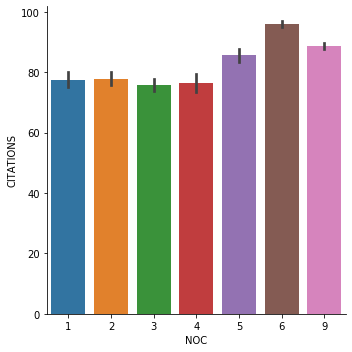

In [36]:
sns.catplot(kind='bar',x='NOC',y='CITATIONS',data=x)

In [37]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
scale.fit(x)
x=scale.transform(x)

In [38]:
from sklearn.cluster import KMeans
k=5
k_means=KMeans(init='k-means++',n_clusters=k,n_init=12)
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
df.insert(0, 'Cluster Labels', k_means.labels_)

In [40]:
df.head()

,Cluster Labels,SCHOOL,STATE,CITY,NOC,PROGRAM,TYPE,DEPARTMENT,DELIVERY,LOC_LAT,LOC_LONG,TEACHING,RESEARCH,CITATIONS,TOTAL_SCORE,NUM_STUDENTS
0,0,Albright College,Pennsylvania,Reading,1,M.S. in Business Intelligence,1,Erivan K. Haub School of Business,5,40.3602,-75.9101,55.907738,52.238393,82.9,67.161538,20713.0
1,0,American Sentinel University,Colorado,Aurora,1,Master of Science Business Intelligence and An...,1,Not Available,5,39.6766,-104.8310,55.907738,52.238393,82.9,67.161538,20713.0
2,0,American University,District of Columbia,Washington,2,Online MBA with Analytics Concentration,1,Kogod School of Business,5,38.9378,-77.0901,42.200000,16.500000,41.1,67.161538,11604.0
3,0,American University,District of Columbia,Washington,2,Master of Science in Analytics,1,Kogod School of Business,5,38.9378,-77.0901,42.200000,16.500000,41.1,67.161538,11604.0
4,3,Arizona State University,Arizona,Tempe,1,Master of Science in Business Analytics,1,W.P. Carey School of Business,3,33.4219,-111.9400,33.800000,35.900000,83.6,48.900000,83236.0


In [41]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

Solving environment: ...working... done

# All requested packages already installed.



In [42]:
import matplotlib.cm as cm
import matplotlib.colors as colors
latitude=37.0902
longitude=-95.7129
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['LOC_LAT'], df['LOC_LONG'], df['SCHOOL'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
df1=df.loc[df['Cluster Labels'] == 0, df.columns[[1] + list(range(4, df.shape[1]))]]

In [44]:
df2=df.loc[df['Cluster Labels'] == 1, df.columns[[1] + list(range(4, df.shape[1]))]]

In [45]:
df3=df.loc[df['Cluster Labels'] == 2, df.columns[[1] + list(range(4, df.shape[1]))]]

In [46]:
df4=df.loc[df['Cluster Labels'] == 3, df.columns[[1] + list(range(4, df.shape[1]))]]

In [47]:
df5=df.loc[df['Cluster Labels'] == 4, df.columns[[1] + list(range(4, df.shape[1]))]]

In [48]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(148, 13)
(317, 13)
(167, 13)
(167, 13)
(155, 13)


In [49]:
df1.head()

,SCHOOL,NOC,PROGRAM,TYPE,DEPARTMENT,DELIVERY,LOC_LAT,LOC_LONG,TEACHING,RESEARCH,CITATIONS,TOTAL_SCORE,NUM_STUDENTS
0,Albright College,1,M.S. in Business Intelligence,1,Erivan K. Haub School of Business,5,40.3602,-75.9101,55.907738,52.238393,82.9,67.161538,20713.0
1,American Sentinel University,1,Master of Science Business Intelligence and An...,1,Not Available,5,39.6766,-104.8310,55.907738,52.238393,82.9,67.161538,20713.0
2,American University,2,Online MBA with Analytics Concentration,1,Kogod School of Business,5,38.9378,-77.0901,42.200000,16.500000,41.1,67.161538,11604.0
3,American University,2,Master of Science in Analytics,1,Kogod School of Business,5,38.9378,-77.0901,42.200000,16.500000,41.1,67.161538,11604.0
10,Aspen University,1,Master of Science in Technology and Innovation...,1,Not Available,5,39.7037,-104.9400,55.907738,52.238393,82.9,67.161538,20713.0


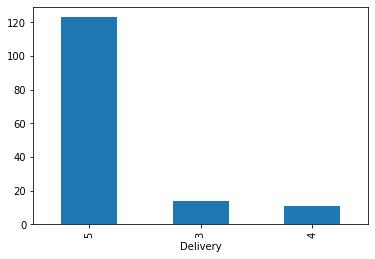

In [50]:
df1['DELIVERY'].value_counts().plot(kind='bar')
plt.xlabel('Delivery')
plt.show()

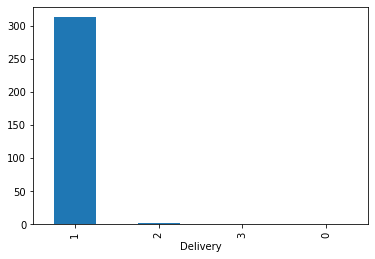

In [51]:
df2['DELIVERY'].value_counts().plot(kind='bar')
plt.xlabel('Delivery')
plt.show()

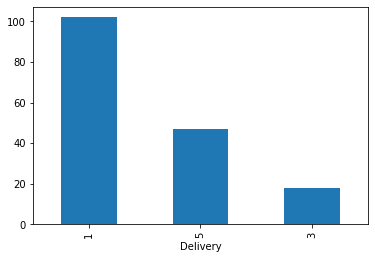

In [52]:
df3['DELIVERY'].value_counts().plot(kind='bar')
plt.xlabel('Delivery')
plt.show()

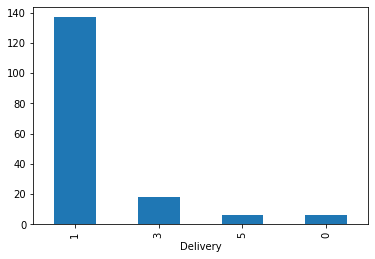

In [53]:
df4['DELIVERY'].value_counts().plot(kind='bar')
plt.xlabel('Delivery')
plt.show()

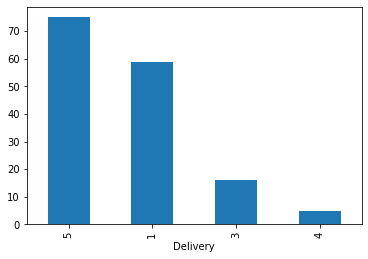

In [54]:
df5['DELIVERY'].value_counts().plot(kind='bar')
plt.xlabel('Delivery')
plt.show()

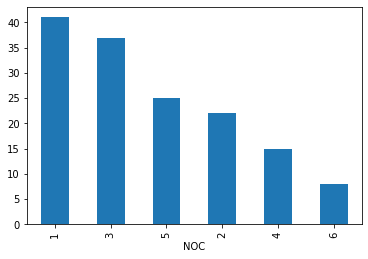

In [55]:
df1['NOC'].value_counts().plot(kind='bar')
plt.xlabel('NOC')
plt.show()

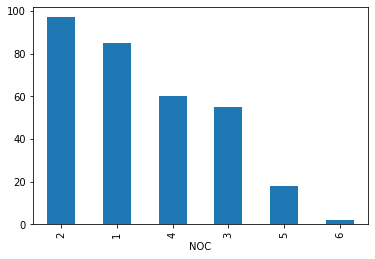

In [56]:
df2['NOC'].value_counts().plot(kind='bar')
plt.xlabel('NOC')
plt.show()

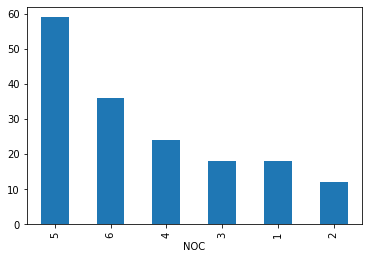

In [57]:
df3['NOC'].value_counts().plot(kind='bar')
plt.xlabel('NOC')
plt.show()

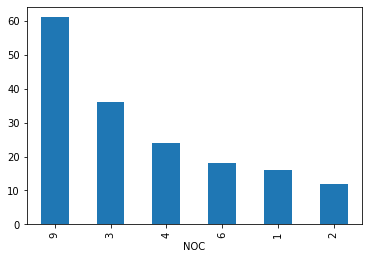

In [58]:
df4['NOC'].value_counts().plot(kind='bar')
plt.xlabel('NOC')
plt.show()

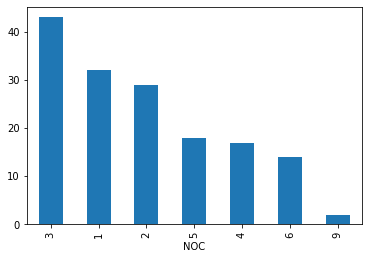

In [59]:
df5['NOC'].value_counts().plot(kind='bar')
plt.xlabel('NOC')
plt.show()

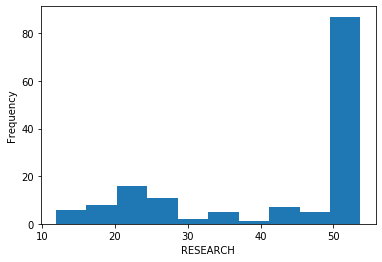

In [60]:
df1['RESEARCH'].plot(kind='hist')
plt.xlabel('RESEARCH')
plt.show()

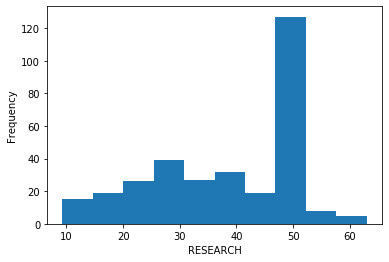

In [61]:
df2['RESEARCH'].plot(kind='hist')
plt.xlabel('RESEARCH')
plt.show()

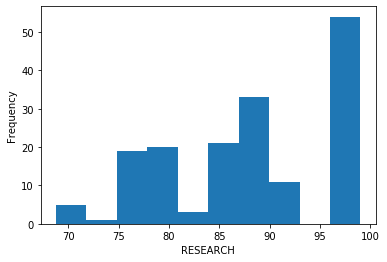

In [62]:
df3['RESEARCH'].plot(kind='hist')
plt.xlabel('RESEARCH')
plt.show()

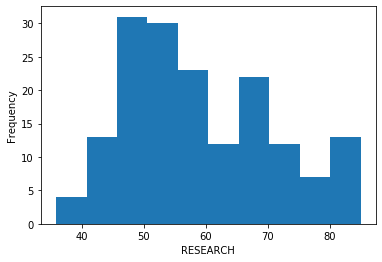

In [63]:
df4['RESEARCH'].plot(kind='hist')
plt.xlabel('RESEARCH')
plt.show()

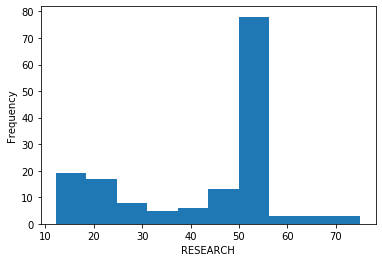

In [64]:
df5['RESEARCH'].plot(kind='hist')
plt.xlabel('RESEARCH')
plt.show()

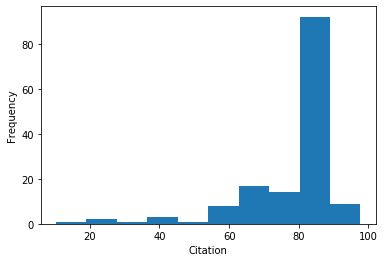

In [65]:
df1['CITATIONS'].plot(kind='hist')
plt.xlabel('Citation')
plt.show()

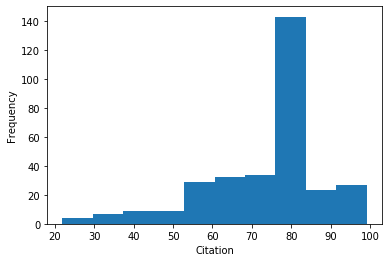

In [66]:
df2['CITATIONS'].plot(kind='hist')
plt.xlabel('Citation')
plt.show()

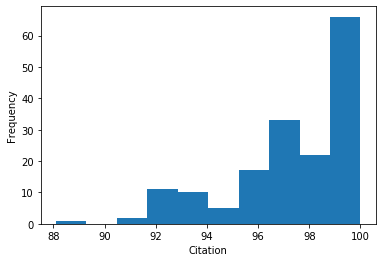

In [67]:
df3['CITATIONS'].plot(kind='hist')
plt.xlabel('Citation')
plt.show()

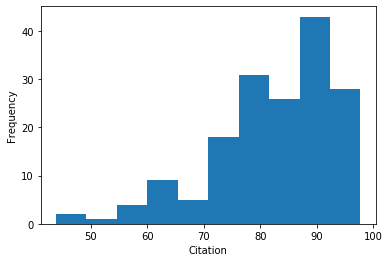

In [68]:
df4['CITATIONS'].plot(kind='hist')
plt.xlabel('Citation')
plt.show()

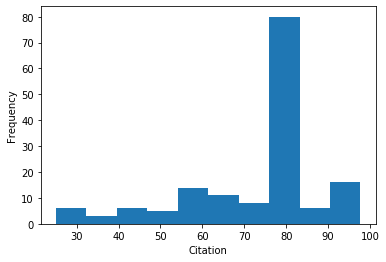

In [69]:
df5['CITATIONS'].plot(kind='hist')
plt.xlabel('Citation')
plt.show()

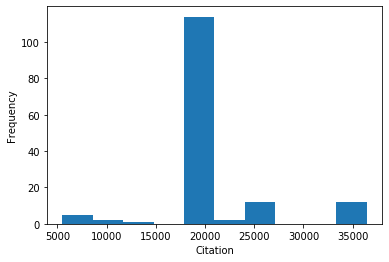

In [70]:
df1['NUM_STUDENTS'].plot(kind='hist')
plt.xlabel('Citation')
plt.show()

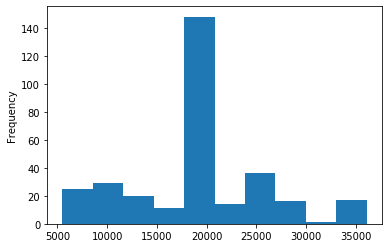

In [71]:
df2['NUM_STUDENTS'].plot(kind='hist')

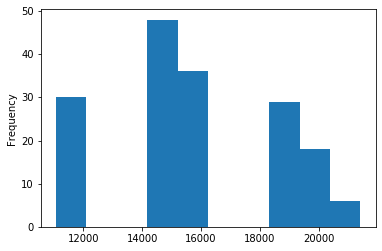

In [72]:
df3['NUM_STUDENTS'].plot(kind='hist')

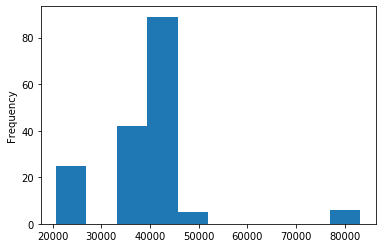

In [73]:
df4['NUM_STUDENTS'].plot(kind='hist')

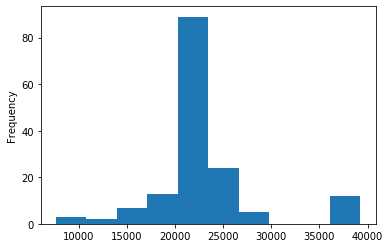

In [74]:
df5['NUM_STUDENTS'].plot(kind='hist')